Bangladesh is a developing country. During this lockdown situation, we are struggling to continue our surveys. The data was taken from BUET: a renowned enginnering university in Bangladesh. The survey was done to check the feasibility of online classes

In [1]:
## importing file
import pandas as pd
import numpy as np

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns; sns.set()
import plotly.express as px
plt.style.use('seaborn-whitegrid')
import missingno as msn

#map
import geopandas
from shapely.geometry import Point
import plotly.graph_objects as go

#import spellchecker
import enchant

In [2]:
#reading files
fileName = "EEE 17_ Online Class Feasibility Survey for Current BUETIANS .xlsx"
file = pd.read_excel(fileName)
file.to_csv("EEE 17_ Online Class Feasibility Survey for Current BUETIANS .csv", index = 'True')
file.head()

Mahdi Hossain      17082  EEE     Faridpur District  \
0     Minmoy Kumar Kundu  1606001.0  EEE    Gaibandha District   
1        Elin Ranjan Das  1706002.0  EEE        Dhaka District   
2     Md. Jawad Ul Islam  1706003.0  EEE      Tangail District   
3            Aroni Ghosh  1706004.0  EEE  Kishoreganj District   
4  Nabila Tasfiha Rahman  1706005.0  EEE        Dhaka District   

     Faridpur Sadar  Yes   No No.1   3G      1  ...  Unnamed: 12  Unnamed: 13  \
0        Sundargang  Yes   No  Yes   3G  2mbps  ...          NaN          NaN   
1       Shajahanpur  Yes  Yes  NaN  NaN    NaN  ...          NaN          NaN   
2     Tangail Sadar  Yes  Yes  NaN  NaN    NaN  ...          NaN          NaN   
3  Kishorganj Sadar  Yes   No  Yes   4G    NaN  ...          NaN          NaN   
4             dhaka  Yes  Yes  NaN  NaN    NaN  ...          NaN          NaN   

   Unnamed: 14  Resident  at hall  Both laptop and mobile with you  \
0          NaN  Resident  at hall  Both laptop and mobile with you   
1          NaN  Attached      NaN                              NaN   
2          NaN  Resident  at hall  Both laptop and mobile with you   
3          NaN  Resident  at hall  Both laptop and mobile with you   
4          NaN  Attached      NaN                              NaN   

  Recorded Video Tutorials, Uploaded Lecture Notes (PPT, Word or PDF)  \
0  Recorded Video Tutorials, Online Conference Pl...                    
1  Recorded Video Tutorials, Uploaded Lecture Not...                    
2  Recorded Video Tutorials, Online Conference Pl...                    
3                           Recorded Video Tutorials                    
4  Recorded Video Tutorials, Uploaded Lecture Not...                    

   After resuming the offline classes Unnamed: 20 Unnamed: 21  
0    Both of these as per requirement         NaN         NaN  
1  After resuming the offline classes         NaN         NaN  
2    Both of these as per requirement         NaN         NaN  
3  After resuming the offline classes         NaN         NaN  
4  After resuming the offline classes         NaN         NaN  

[5 rows x 22 columns]

In [3]:
#create new dataframe
df = pd.DataFrame()

In [4]:
#the csv file has some errors so, I had to carefully make a dataframe out of this
df['Name'] = file['Mahdi Hossain']
df['Roll'] = file.iloc[:,1]
df['District'] = file.iloc[:,3]
df['Upazila_Thana'] = file.iloc[:,4]
df['Required_device'] = file.iloc[:,5]
df['Broadband'] = file.iloc[:,6]
df['two_month_net'] = file.iloc[:,7]
df['Cellular'] = file.iloc[:,8]
df['Net_speed'] = file.iloc[:,9]
df['Hall'] = file['Resident']
df['Books'] = file['at hall']
df['Class_System'] = file.iloc[:,18]
df['Ct'] = file.iloc[:,19]
df['Comments'] = file.iloc[:,21]
#dropping the faltus
df = df.drop(df.index[189:999]) #xlx is 190 last name Aong
df.tail()

Name       Roll             District  \
184             Fardin Alvi  1706183.0  Mymensingh District   
185          shariyar kabir  1706184.0   Joypurhat District   
186            Swapneel Sen  1706185.0  Chittagong District   
187    Shahriar Kabir Nahin  1706186.0       Bogra District   
188  MD. Mehedi Hasan Munna  1706187.0    Kurigram District   

         Upazila_Thana Required_device Broadband two_month_net Cellular  \
184              Sadar             Yes       Yes           NaN      NaN   
185            Khetlal             Yes        No            No       3G   
186         Chittagong             Yes       Yes           NaN      NaN   
187  Bogra Sadar Thana             Yes       Yes           NaN      NaN   
188       Bhurungamari             Yes        No           Yes       3G   

                                          Net_speed      Hall     Books  \
184                                             NaN  Resident   at hall   
185                                         500kbps  Resident   at hall   
186                                             NaN  Resident  with you   
187                                             NaN  Resident  with you   
188  Upload Speed:0.28 Mbps Download Speed:0.82Mbps  Resident   at hall   

                                          Class_System  \
184  Recorded Video Tutorials, Online Conference Pl...   
185          Uploaded Lecture Notes (PPT, Word or PDF)   
186  Recorded Video Tutorials, Uploaded Lecture Not...   
187  Recorded Video Tutorials, Online Conference Pl...   
188  Recorded Video Tutorials, Uploaded Lecture Not...   

                                     Ct  \
184    Both of these as per requirement   
185                                 NaN   
186  After resuming the offline classes   
187    Both of these as per requirement   
188    Both of these as per requirement   

                                              Comments  
184                                               nahh  
185                                                NaN  
186  Please try to make the procedure feasible for ...  
187                   I have some of my books with me.  
188  There are no financial problems for me now.But...

In [5]:
#deleting duplicate datas
df.drop_duplicates(subset = 'Roll', keep = 'last', inplace = True)
print(len(df))

175


# Feature analysis

## District
Where ae they living currently

In [6]:
for i in range(len(df)):
    listi = df.iloc[i]['District'].split()
    new_value = listi[0]
    df["District"]= df["District"].str.replace(df.iloc[i]['District'], new_value, case = True) 
print(df.District.value_counts())

Dhaka           70
Khulna          12
Chittagong      12
Comilla          7
Mymensingh       7
Sylhet           5
Rajshahi         5
Pabna            4
Bogra            4
Rangpur          4
Dinajpur         3
Kurigram         3
Faridpur         3
Narayanganj      2
Sirajganj        2
Bagerhat         2
Kishoreganj      2
Thakurgaon       2
Gazipur          2
Chapai           2
Satkhira         2
Kushtia          2
Gaibandha        2
Narail           1
Joypurhat        1
Khagrachhari     1
Lakshmipur       1
Noakhali         1
Jamalpur         1
Tangail          1
Chandpur         1
Netrokona        1
Natore           1
Naogaon          1
Jessore          1
Brahmanbaria     1
Barisal          1
Moulvibazar      1
Meherpur         1
Name: District, dtype: int64


<class 'geopandas.geodataframe.GeoDataFrame'>


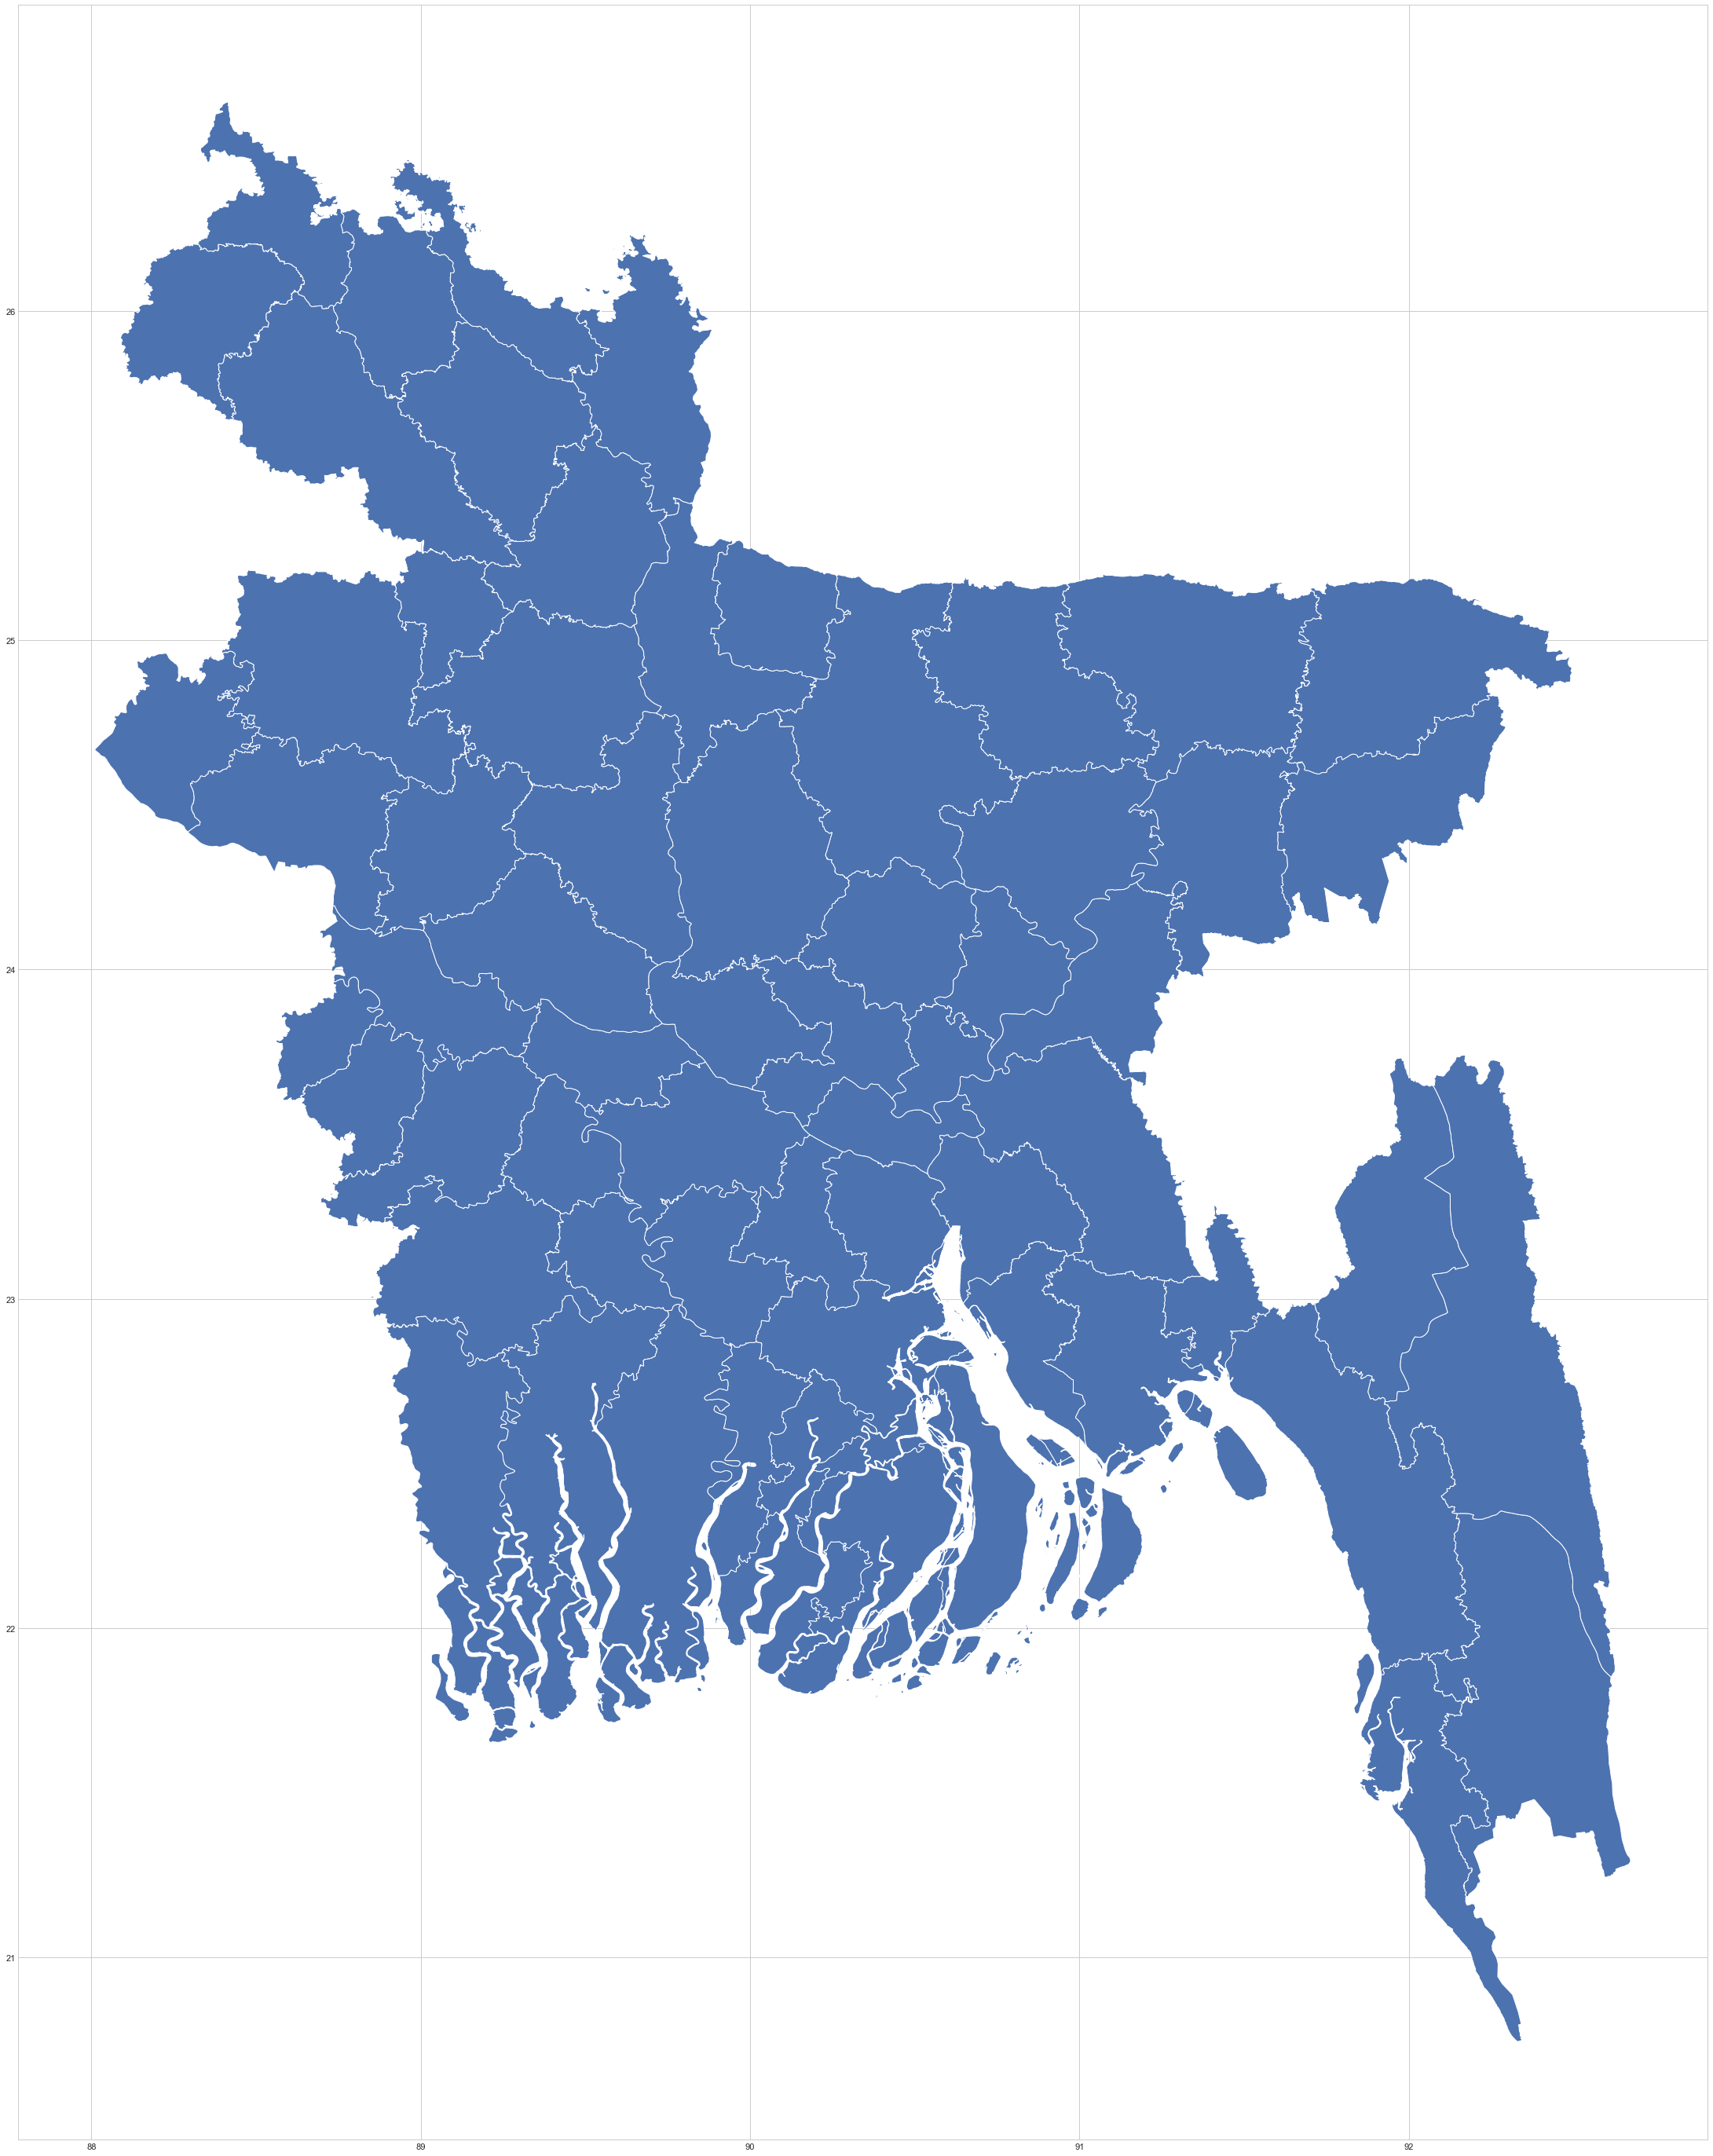

In [7]:
# Getting to know GEOJSON file:
country = geopandas.read_file("bangladesh.json")

#check the data
country.head()
print(type(country))
type(country.geometry)
type(country.geometry[0])

#plot the map
fig = country.plot(figsize = (200, 50))

#create an empty dataframe to store the lat,long, name, and cases
myDF = pd.DataFrame()
myDF['Lat'] = country.geometry.centroid.x
myDF['Long'] = country.geometry.centroid.y
myDF['Zilla'] = country['NAME_2']

#write the name of all zillas in a text file and prepare the custom dictionary
allZilla = '\n'.join(zillas for zillas in list(myDF.iloc[:,2]))
with open("zillaNames.txt", "w") as outfile:
    outfile.write(allZilla)

zillaList = enchant.PyPWL("zillaNames.txt")

In [8]:
for i in range(len(df)):
    if((df.iloc[i]["District"] in allZilla) == False): print(df.iloc[i]["District"])

Chapai
Chapai
Moulvibazar
Netrokona
Brahmanbaria


In [9]:
df["District"]= df["District"].str.replace("Chapai", "Nawabganj", case = True)
df["District"]= df["District"].str.replace("Netrokona", "Netrakona", case = True)
df["District"]= df["District"].str.replace("Moulvibazar", "Maulvibazar", case = True)
df["District"]= df["District"].str.replace("Brahmanbaria", "Brahamanbaria", case = True)

In [10]:
for i in range(len(df)):
    if((df.iloc[i]["District"] in allZilla) == False): print(df.iloc[i]["District"])

In [11]:
new = pd.DataFrame()
new = df['District']
caselist = []
listi = new.value_counts().reset_index().values.tolist()

onlyNames = []
for i in range(len(listi)):
    onlyNames.append(listi[i][0])
print(onlyNames)

for i in range(len(country['NAME_2'])):
    if((country.iloc[i]['NAME_2'] in onlyNames) == False): caselist.append(0)
    else: 
        ind = onlyNames.index(country.iloc[i]['NAME_2'])
        caselist.append(listi[ind][1])

print(caselist)

['Dhaka', 'Chittagong', 'Khulna', 'Mymensingh', 'Comilla', 'Rajshahi', 'Sylhet', 'Rangpur', 'Pabna', 'Bogra', 'Faridpur', 'Dinajpur', 'Kurigram', 'Kishoreganj', 'Gazipur', 'Bagerhat', 'Gaibandha', 'Nawabganj', 'Kushtia', 'Satkhira', 'Sirajganj', 'Thakurgaon', 'Narayanganj', 'Meherpur', 'Noakhali', 'Khagrachhari', 'Jessore', 'Lakshmipur', 'Narail', 'Netrakona', 'Maulvibazar', 'Natore', 'Tangail', 'Naogaon', 'Brahamanbaria', 'Joypurhat', 'Barisal', 'Chandpur', 'Jamalpur']
[0, 1, 0, 0, 0, 0, 0, 1, 1, 12, 7, 0, 0, 1, 1, 1, 0, 70, 3, 2, 0, 1, 2, 0, 0, 0, 7, 2, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 12, 2, 0, 1, 1, 2, 4, 1, 1, 1, 2, 4, 5, 2, 3, 2, 3, 0, 0, 0, 4, 2, 0, 1, 0, 5]


In [12]:
country.head()

id GID_0      NAME_0    GID_1   NAME_1  \
0  level_2_administrative_areas.1   BGD  Bangladesh  BGD.1_1  Barisal   
1  level_2_administrative_areas.2   BGD  Bangladesh  BGD.1_1  Barisal   
2  level_2_administrative_areas.3   BGD  Bangladesh  BGD.1_1  Barisal   
3  level_2_administrative_areas.4   BGD  Bangladesh  BGD.1_1  Barisal   
4  level_2_administrative_areas.5   BGD  Bangladesh  BGD.1_1  Barisal   

  NL_NAME_1      GID_2      NAME_2 VARNAME_2 NL_NAME_2 TYPE_2 ENGTYPE_2  CC_2  \
0            BGD.1.1_1     Barguna                       Zila   Distict  1004   
1            BGD.1.2_1     Barisal                       Zila   Distict  1006   
2            BGD.1.3_1       Bhola                       Zila   Distict  1009   
3            BGD.1.4_1   Jhalokati                       Zila   Distict  1042   
4            BGD.1.5_1  Patuakhali                       Zila   Distict  1078   

     HASC_2                                           geometry  
0  BD.BA.PR  MULTIPOLYGON (((90.02618 21.91988, 90.02531 21...  
1  BD.BA.PR  MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...  
2  BD.BA.PR  MULTIPOLYGON (((90.77148 21.85594, 90.76920 21...  
3  BD.BA.PR  MULTIPOLYGON (((90.10051 22.35662, 90.10024 22...  
4  BD.BA.PR  MULTIPOLYGON (((90.47569 21.76975, 90.47565 21...

In [13]:
country['cases'] = caselist

In [14]:
country.head()

id GID_0      NAME_0    GID_1   NAME_1  \
0  level_2_administrative_areas.1   BGD  Bangladesh  BGD.1_1  Barisal   
1  level_2_administrative_areas.2   BGD  Bangladesh  BGD.1_1  Barisal   
2  level_2_administrative_areas.3   BGD  Bangladesh  BGD.1_1  Barisal   
3  level_2_administrative_areas.4   BGD  Bangladesh  BGD.1_1  Barisal   
4  level_2_administrative_areas.5   BGD  Bangladesh  BGD.1_1  Barisal   

  NL_NAME_1      GID_2      NAME_2 VARNAME_2 NL_NAME_2 TYPE_2 ENGTYPE_2  CC_2  \
0            BGD.1.1_1     Barguna                       Zila   Distict  1004   
1            BGD.1.2_1     Barisal                       Zila   Distict  1006   
2            BGD.1.3_1       Bhola                       Zila   Distict  1009   
3            BGD.1.4_1   Jhalokati                       Zila   Distict  1042   
4            BGD.1.5_1  Patuakhali                       Zila   Distict  1078   

     HASC_2                                           geometry  cases  
0  BD.BA.PR  MULTIPOLYGON (((90.02618 21.91988, 90.02531 21...      0  
1  BD.BA.PR  MULTIPOLYGON (((90.43000 22.49504, 90.43000 22...      1  
2  BD.BA.PR  MULTIPOLYGON (((90.77148 21.85594, 90.76920 21...      0  
3  BD.BA.PR  MULTIPOLYGON (((90.10051 22.35662, 90.10024 22...      0  
4  BD.BA.PR  MULTIPOLYGON (((90.47569 21.76975, 90.47565 21...      0

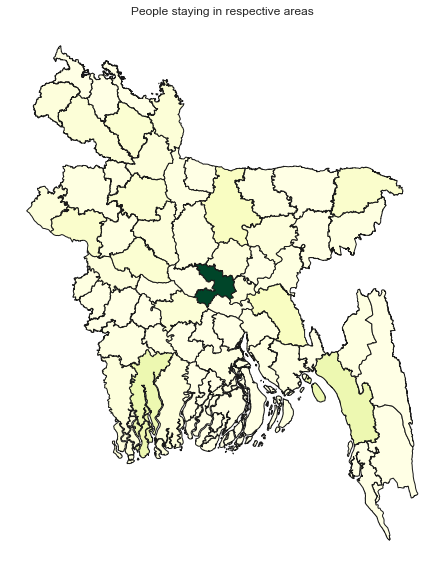

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
myPlt = country.plot(column = 'cases',cmap='YlGn',ax=ax,edgecolor='k')
ax.set_axis_off()
ax.set(title='People staying in respective areas')

fig = myPlt.get_figure()
fig.savefig("output_country.png")

## Required Device
Do they have the required device to continue online classes

Yes    168
No       7
Name: Required_device, dtype: int64


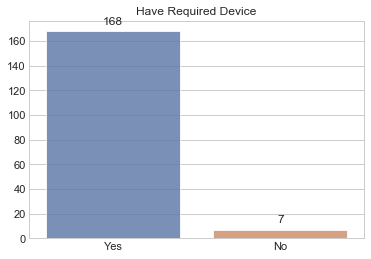

In [16]:
print(df.Required_device.value_counts())
splot = sns.barplot(df.Required_device.value_counts().index, df['Required_device'].value_counts().values, alpha=0.8)
splot.set_title('Have Required Device')
for p in splot.patches:
    splot.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


##  Broadband
Do people have proper broadband connections

Yes    104
No      71
Name: Broadband, dtype: int64


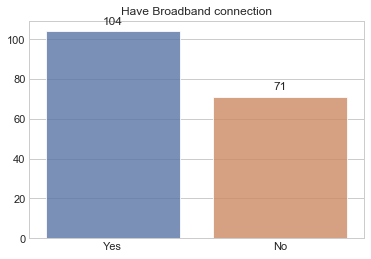

In [17]:
print(df.Broadband.value_counts())
splot = sns.barplot(df.Required_device.value_counts().index, df['Broadband'].value_counts().values, alpha=0.8)
splot.set_title('Have Broadband connection')
for p in splot.patches:
    splot.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## two_month_net
If they can affort buying mobile data for 2 months straight

No     42
Yes    29
Name: two_month_net, dtype: int64


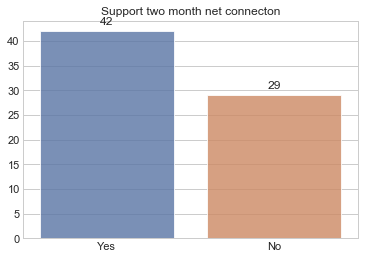

In [18]:
print(df.two_month_net.value_counts())
splot = sns.barplot(df.Required_device.value_counts().index, df['two_month_net'].value_counts().values, alpha=0.8)
splot.set_title('Support two month net connecton')
for p in splot.patches:
    splot.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## Cellular net type

3G                        48
4G                        13
2G                         8
No net coverage at all     2
Name: Cellular, dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE83FB2788>],
      dtype=object)

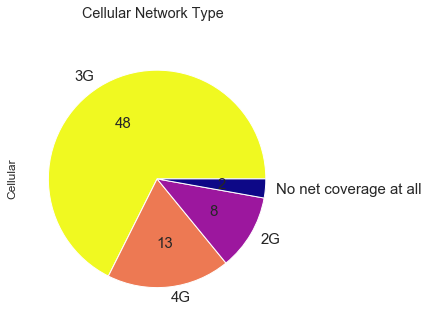

In [19]:
print(df.Cellular.value_counts())

df.Cellular.value_counts().plot(kind='pie', 
                                    figsize = (5,5), 
                                    autopct = lambda p : '{:,.0f}'.format(p * df.Cellular.count()/100) , 
                                    subplots = True,
                                    colormap = "plasma_r", 
                                    title = 'Cellular Network Type', 
                                    fontsize = 15)

## Net speed
Here I just saw people's net connection

In [20]:
df.Net_speed.replace(to_replace = '1Mbps', value = '1', inplace = True)
print(df.Net_speed.value_counts())

1                                                           4
1                                                           3
100                                                         2
500kbps                                                     2
500 kbps                                                    2
1mbps                                                       2
100kbps                                                     1
200kbps                                                     1
200-300 Kbps outside home.                                  1
250--300k                                                   1
980                                                         1
16                                                          1
128KB/s                                                     1
15                                                          1
1.5 Mbps                                                    1
512 Mbps                                                    1
1 Mbps  

## Hall
Hall is synonymous to dorm, 'Resident' means the people who stay in the 'Hall', attached means the people who stay at home

Resident    112
Attached     63
Name: Hall, dtype: int64


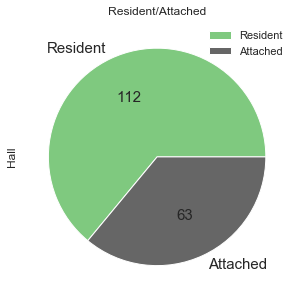

In [21]:
print(df.Hall.value_counts())

df.Hall.value_counts().plot(kind='pie', 
                                    figsize = (5,5), 
                                    autopct = lambda p : '{:,.0f}'.format(p * df.Hall.count()/100) , 
                                    subplots = False,
                                    colormap = 'Accent', 
                                    title = 'Resident/Attached', 
                                    legend= True, 
                                    fontsize = 15)

## Where left the books
As this was a case of emergency, many people left their books in the Hall

at hall     81
with you    31
Name: Books, dtype: int64


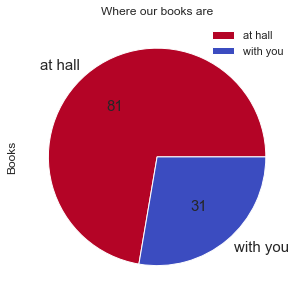

In [22]:
print(df.Books.value_counts())

df.Books.value_counts().plot(kind='pie', 
                                    figsize = (5,5), 
                                    autopct = lambda p : '{:,.0f}'.format(p * df.Books.count()/100) , 
                                    subplots = False,
                                    colormap = 'coolwarm_r', 
                                    title = 'Where our books are', 
                                    legend= True, 
                                    fontsize = 15)

## Class System
//this needs to be checked if dataset is changed
People were given 4 options, people could choose any of them, multiple selection was allowed too. So manual processing was demanded

In [23]:
print(df.Class_System.value_counts())

#process the datas manually
recorded = []
recorded.append(len(df.loc[df['Class_System'] == 'Recorded Video Tutorials, Uploaded Lecture Notes (PPT, Word or PDF)']))
recorded.append(len(df.loc[df['Class_System'] == 'Recorded Video Tutorials']))
recorded.append(len(df.loc[df['Class_System'] == 'Recorded Video Tutorials, Online Conference Platforms (like Zoom), Uploaded Lecture Notes (PPT, Word or PDF)']))
recorded.append(len(df.loc[df['Class_System'] == 'Recorded Video Tutorials, Online Conference Platforms (like Zoom), Facebook Live, Uploaded Lecture Notes (PPT, Word or PDF)']))
recorded.append(len(df.loc[df['Class_System'] == 'Recorded Video Tutorials, Facebook Live, Uploaded Lecture Notes (PPT, Word or PDF)']))
recorded.append(len(df.loc[df['Class_System'] == 'Recorded Video Tutorials, Online Conference Platforms (like Zoom)']))

uploaded = []
uploaded.append(len(df.loc[df['Class_System'] == 'Recorded Video Tutorials, Uploaded Lecture Notes (PPT, Word or PDF)']))
uploaded.append(len(df.loc[df['Class_System'] == 'Uploaded Lecture Notes (PPT, Word or PDF)']))
uploaded.append(len(df.loc[df['Class_System'] == 'Recorded Video Tutorials, Online Conference Platforms (like Zoom), Uploaded Lecture Notes (PPT, Word or PDF)']))
uploaded.append(len(df.loc[df['Class_System'] == 'Recorded Video Tutorials, Online Conference Platforms (like Zoom), Facebook Live, Uploaded Lecture Notes (PPT, Word or PDF)']))
uploaded.append(len(df.loc[df['Class_System'] == 'Recorded Video Tutorials, Facebook Live, Uploaded Lecture Notes (PPT, Word or PDF)']))
uploaded.append(len(df.loc[df['Class_System'] == 'Online Conference Platforms (like Zoom), Facebook Live, Uploaded Lecture Notes (PPT, Word or PDF)']))
uploaded.append(len(df.loc[df['Class_System'] == 'Online Conference Platforms (like Zoom), Uploaded Lecture Notes (PPT, Word or PDF)']))

conference = []
conference.append(len(df.loc[df['Class_System'] == 'Recorded Video Tutorials, Online Conference Platforms (like Zoom), Uploaded Lecture Notes (PPT, Word or PDF)']))
conference.append(len(df.loc[df['Class_System'] == 'Online Conference Platforms (like Zoom)']))
conference.append(len(df.loc[df['Class_System'] == 'Recorded Video Tutorials, Online Conference Platforms (like Zoom), Facebook Live, Uploaded Lecture Notes (PPT, Word or PDF)']))
conference.append(len(df.loc[df['Class_System'] == 'Recorded Video Tutorials, Facebook Live, Uploaded Lecture Notes (PPT, Word or PDF)']))
conference.append(len(df.loc[df['Class_System'] == 'Online Conference Platforms (like Zoom), Facebook Live, Uploaded Lecture Notes (PPT, Word or PDF)']))
conference.append(len(df.loc[df['Class_System'] == 'Online Conference Platforms (like Zoom), Uploaded Lecture Notes (PPT, Word or PDF)']))

facebook = []
facebook.append(len(df.loc[df['Class_System'] == 'Recorded Video Tutorials, Online Conference Platforms (like Zoom), Facebook Live, Uploaded Lecture Notes (PPT, Word or PDF)']))
facebook.append(len(df.loc[df['Class_System'] == 'Recorded Video Tutorials, Facebook Live, Uploaded Lecture Notes (PPT, Word or PDF)']))
facebook.append(len(df.loc[df['Class_System'] == 'Online Conference Platforms (like Zoom), Facebook Live, Uploaded Lecture Notes (PPT, Word or PDF)']))
facebook.append(len(df.loc[df['Class_System'] == 'Facebook Live']))



Recorded Video Tutorials, Uploaded Lecture Notes (PPT, Word or PDF)                                                            69
Recorded Video Tutorials                                                                                                       31
Uploaded Lecture Notes (PPT, Word or PDF)                                                                                      27
Recorded Video Tutorials, Online Conference Platforms (like Zoom), Uploaded Lecture Notes (PPT, Word or PDF)                   21
Online Conference Platforms (like Zoom)                                                                                         8
Recorded Video Tutorials, Online Conference Platforms (like Zoom)                                                               6
Recorded Video Tutorials, Online Conference Platforms (like Zoom), Facebook Live, Uploaded Lecture Notes (PPT, Word or PDF)     5
Recorded Video Tutorials, Facebook Live, Uploaded Lecture Notes (PPT, Word or PDF)        

In [24]:
labels = ['Recorded Video', 'Online Conference Platforms', 'Uploaded Lecture Notes (PPT, Word or PDF)', 'Facebook Live']
sizes = [sum(recorded), sum(uploaded), sum(conference), sum(facebook)]

import plotly.graph_objects as go

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=labels, y=sizes,
            text=sizes,
            textposition='auto',
        )])

fig.update_traces(marker_color='rgb(158,100,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=3)
fig.update_layout(title_text='Feasible system for classtaking (one selected multiple option)')
fig.show()

## Prefered assessment methods
The survey was made to see how they prefer their daily assessments should be taken in this situation


After resuming the offline classes    126
Both of these as per requirement       40
Through online platforms                6
Name: Ct, dtype: int64


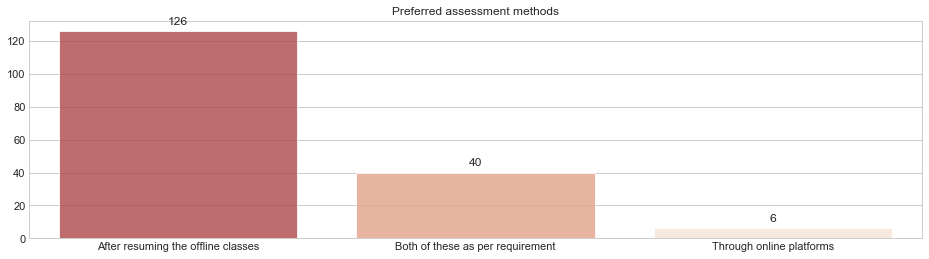

In [25]:
print(df.Ct.value_counts())

fig = plt.figure(figsize= (16,4))
splot = sns.barplot(df.Ct.value_counts().index, df['Ct'].value_counts().values, alpha=0.8, palette = sns.color_palette('RdBu'))
splot.set_title('Preferred assessment methods')
for p in splot.patches:
    splot.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## Comments
People gave their opinion about online class, so I had to manually go through them and write the end result

In [26]:
print(df.Comments.value_counts())
Comments = ["feasible for EVERYBODY(NOT MAJORITY)",
        "internet slow",
        "no broadband",
        "location can't provide live stream for zoom",
        "lives in Dhaka and has broadband connection, still often disconnected for bad weather",
        "go outside for good connection",
        "recorded class ok",
        "loadshedding due to bad weather",
        "online class to lessen pressure of offline class",
        "must be recorded",
        "overwhelmed by the current epidemic, can't concentrate",
        "need internet cost fund",
        "power cut can harm attendence",
        "broadband connection not cost effective",
        "pdf ok",
        "don't have all the books",
        "impossible if long term",
        "class test replaced by assignment",
        "taking attendance postponed",
        "make zoom free for students and teachers"]
for i in range(len(Comments)):
    print(Comments[i])

No                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      13
Nope                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     2
It is impossible for me to attend online classes a

In [27]:
print(len(df))

175
